In [1]:
import numpy as np
import pandas as pd
import pysam
import matplotlib.pyplot as plt
import scipy.stats as st

read_csv

In [31]:
rna_seq = pd.read_csv("rna_qc2.tsv")
atac_seq = pd.read_csv("atac_qc2.tsv")

In [78]:
rna_seq.head()

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,1001
0,"(579111, 0.09380999952554703)","(579112, 0.09380999952554703)","(579113, 0.09380999952554703)","(579114, 0.09380999952554703)","(579115, 0.09380999952554703)","(579116, 0.09380999952554703)","(579117, 0.09380999952554703)","(579118, 0.09380999952554703)","(579119, 0.09380999952554703)","(579120, 0.09380999952554703)",...,"(580103, None)","(580104, None)","(580105, None)","(580106, None)","(580107, None)","(580108, None)","(580109, None)","(580110, None)","(580111, None)",NaN
1,"(579129, 0.09380999952554703)","(579130, 0.09380999952554703)","(579131, 0.09380999952554703)","(579132, 0.09380999952554703)","(579133, 0.09380999952554703)","(579134, 0.09380999952554703)","(579135, 0.09380999952554703)","(579136, 0.09380999952554703)","(579137, 0.09380999952554703)","(579138, 0.09380999952554703)",...,"(580121, None)","(580122, None)","(580123, None)","(580124, None)","(580125, None)","(580126, None)","(580127, None)","(580128, None)","(580129, None)",NaN
2,"(580258, 0.02085000090301037)","(580259, 0.02085000090301037)","(580260, 0.02085000090301037)","(580261, 0.02085000090301037)","(580262, 0.02085000090301037)","(580263, 0.02085000090301037)","(580264, 0.02085000090301037)","(580265, 0.02085000090301037)","(580266, 0.02085000090301037)","(580267, 0.02085000090301037)",...,"(581250, None)","(581251, None)","(581252, None)","(581253, None)","(581254, None)","(581255, None)","(581256, None)","(581257, None)","(581258, None)",NaN
3,"(582269, 0.010420000180602074)","(582270, 0.010420000180602074)","(582271, 0.010420000180602074)","(582272, 0.010420000180602074)","(582273, 0.010420000180602074)","(582274, 0.010420000180602074)","(582275, 0.010420000180602074)","(582276, 0.010420000180602074)","(582277, 0.010420000180602074)","(582278, 0.010420000180602074)",...,"(583261, 20.774580001831055)","(583262, 20.691190719604492)","(583263, 20.743310928344727)","(583264, 20.712039947509766)","(583265, 20.51399040222168)","(583266, 20.076190948486328)","(583267, 19.951099395751953)","(583268, 19.492460250854492)","(583269, 19.471609115600586)",NaN
4,"(2270920, None)","(2270921, None)","(2270922, None)","(2270923, None)","(2270924, None)","(2270925, None)","(2270926, None)","(2270927, None)","(2270928, None)","(2270929, None)",...,"(2271912, 10.90326976776123)","(2271913, 11.0075101852417)","(2271914, 10.94495964050293)","(2271915, 10.92411994934082)","(2271916, 10.976229667663574)","(2271917, 10.90326976776123)","(2271918, 10.92411994934082)","(2271919, 10.934539794921875)","(2271920, 10.892840385437012)",NaN


In [32]:
rna=[]
for i in range(rna_seq.index.stop):
    rna.append(list(rna_seq.iloc[i,:].dropna()))

In [5]:
def str_to_ls(input_str):
    str_list = input_str[1:-1].split(',')
    new_list = []
    new_list.append(int(str_list[0]))
    if str_list[1] != ' None':
        new_list.append(float(str_list[1]))
    else:
        new_list.append(0)
    return(new_list)

In [33]:
whole_qc_rna = []
for j in range(len(rna)):
    ls = []
    for i in range(len(rna[j])):
        ls.append(str_to_ls(rna[j][i]))
    whole_qc_rna.append(ls)

In [94]:
#whole_qc_rna

In [34]:
atac_qc=[]
for i in range(atac_seq.shape[0]):
    atac_qc.append(list(atac_seq.iloc[i,:].dropna()))

In [95]:
#atac_qc

In [35]:
whole_qc_atac = []
for j in range(len(atac_qc)):
    ls = []
    for i in range(len(atac_qc[j])):
        ls.append(str_to_ls(atac_qc[j][i]))
    whole_qc_atac.append(ls)

In [9]:
def where_skewed(sig_list):
    sig_list = pd.DataFrame(sig_list)
    x = sig_list.values[:,0]
    y = sig_list.values[:,1]
    if st.skew(y) > 0:
        return(1)                   # right skewed
    elif st.skew(y) == 0:
        return(0)                   # symmetric
    else:
        return(-1)                  # left skewed

In [10]:
def len_saming(rna_list, atac_list):
    new_list=[]
    if len(rna_list) > len(atac_list):
        diff = len(rna_list) - len(atac_list)
        atac_list = pd.DataFrame(atac_list)
        x = atac_list.values[:,0]
        y = atac_list.values[:,1]
        skewness = st.skew(y)
        if where_skewed(atac_list) == 1:                          #right skewed -> skew : 1
            add_pre = [0]*int(np.around(diff*skewness/(1+skewness)))
            add_app = [0]*(diff - int(np.around(diff*skewness/(1+skewness))))
            
        elif where_skewed(atac_list) == -1:                                     #left skewed -> 1 : -skew
            add_pre = [0]*int(np.around(diff/(1-skewness)))
            add_app = [0]*(diff - int(np.around(diff/(1-skewness))))
            
        else:
            add_pre = [0]*int(np.around(diff/2))
            add_app = [0]*(diff - int(np.around(diff/2)))
            
        y = np.insert(y,0,add_pre)
        y = np.append(y,add_app)
        rna_list = pd.DataFrame(rna_list)
        y2 = rna_list.values[:,1]
        return(y2,y)
    else:
        diff = len(atac_list) - len(rna_list)
        rna_list = pd.DataFrame(rna_list)
        x = rna_list.values[:,0]
        y = rna_list.values[:,1]
        skewness = st.skew(y)
        if where_skewed(rna_list) == 1:                              #right skewed -> skew : 1
            add_pre = [0]*int(np.around(diff*skewness/(1+skewness)))
            add_app = [0]*(diff - int(np.around(diff*skewness/(1+skewness))))
            
        elif where_skewed(rna_list) == -1:                           #left skewed -> 1 : -skew
            add_pre = [0]*int(np.around(diff/(1-skewness)))
            add_app = [0]*(diff - int(np.around(diff/(1-skewness))))
        
        else:
            add_pre = [0]*int(np.around(diff/2))
            add_app = [0]*(diff - int(np.around(diff/2)))
            
        y = np.insert(y,0,add_pre)
        y = np.append(y,add_app)
        atac_list = pd.DataFrame(atac_list)
        y2 = atac_list.values[:,1]
        return(y,y2)

In [11]:
def cal_corr(rna,atac):
    corr_mat = []
    index = []
    columns = []
    for i in range(len(atac)):
        index.append("atac[%d]" %(i))
        
    for i in range(len(rna)):
        columns.append("rna[%d]" %(i))
    
    for atac_region in atac:
        corr_row = []
        for rna_region in rna:
            if len(rna_region) == len(atac_region):
                rna_region = pd.DataFrame(rna_region)
                atac_region = pd.DataFrame(atac_region)
                yr = rna_region.values[:,1]
                ya = atac_region.values[:,1]
                corr, p_val = st.pearsonr(yr, ya)
                #if np.isnan(corr):
                #    corr = 0
                #    p_val = 1
                #corr_row.append(corr)
            else:
                corr, p_val = st.pearsonr(len_saming(rna_region,atac_region)[0],len_saming(rna_region,atac_region)[1])
                #if np.isnan(corr):
                #    corr = 0
                #    p_val = 1
                #corr_row.append(corr)
            corr_row.append(corr)
        corr_mat.append(corr_row)
    corr_mat = pd.DataFrame(corr_mat, index = index, columns = columns)
    return(corr_mat)

In [228]:
len(whole_qc_rna)

27

In [36]:
result = cal_corr(whole_qc_rna,whole_qc_atac)

In [13]:
result

,rna[0],rna[1],rna[2],rna[3],rna[4],rna[5],rna[6],rna[7],rna[8],rna[9],...,rna[73],rna[74],rna[75],rna[76],rna[77],rna[78],rna[79],rna[80],rna[81],rna[82]
atac[0],0.174970,0.055286,0.060918,0.062974,0.062080,0.064562,0.235075,0.091890,0.067750,0.058322,...,0.342770,0.330151,0.299756,-0.108637,-0.112100,-0.245576,-0.255004,0.350789,0.352859,0.337978
atac[1],-0.074369,0.175297,0.175502,0.173216,0.166321,0.155205,0.250358,0.241234,0.257609,0.263447,...,0.391990,0.379493,0.343981,0.296461,0.282767,0.068020,0.045383,0.440485,0.459614,0.540986
atac[2],-0.007239,0.007582,0.007046,0.000967,-0.007403,-0.012957,0.519756,0.479157,0.450818,0.446207,...,0.247181,0.237630,0.217624,0.471540,0.474080,0.421047,0.394366,0.473014,0.486585,0.637178
atac[3],0.079191,-0.118662,-0.126406,-0.143934,-0.159040,-0.176494,0.401488,0.215656,0.146919,0.113882,...,0.218052,0.238202,0.289563,0.263027,0.253445,-0.036396,-0.061071,0.477953,0.480597,0.480647
atac[4],-0.087759,0.045327,0.043200,0.031265,0.021859,0.014560,0.357602,0.306839,0.287042,0.282815,...,0.352637,0.346870,0.348886,0.380462,0.371664,0.130423,0.100773,0.405625,0.413196,0.492640
atac[5],0.500024,0.238395,0.219581,0.188375,0.156187,0.095501,0.478774,0.344643,0.277700,0.243526,...,0.203894,0.159066,0.071478,0.076643,0.074315,-0.064305,-0.096563,0.549378,0.559884,0.590303
atac[6],0.323078,0.344049,0.333266,0.315013,0.295060,0.265302,0.247841,0.286475,0.253440,0.238255,...,0.369797,0.334756,0.257680,-0.087672,-0.084910,-0.142429,-0.161866,0.294103,0.304624,0.386938
atac[7],0.596941,0.385783,0.367524,0.335990,0.302005,0.233945,0.453899,0.377855,0.292878,0.249962,...,0.240001,0.182651,0.073962,0.112248,0.109921,-0.047231,-0.089551,0.534718,0.553212,0.608827
atac[8],0.541140,0.442053,0.422781,0.392437,0.363044,0.299352,0.406387,0.417918,0.351620,0.317703,...,0.311396,0.252417,0.139524,0.097559,0.104124,-0.009318,-0.039653,0.450777,0.481037,0.596999
atac[9],0.571430,0.185521,0.162441,0.125844,0.089638,0.027407,0.474676,0.208024,0.121612,0.081648,...,0.020118,-0.027676,-0.111756,0.017725,0.014255,-0.166852,-0.193162,0.539100,0.542605,0.530531


In [37]:
SSC = 0
for i in range(min(result.shape)):
    SSC += np.square(result.values[i,i])
MSC = SSC/min(result.shape)
corr = np.sqrt(MSC)

In [38]:
print("Correlation : %f" %corr)

Correlation : 0.064469


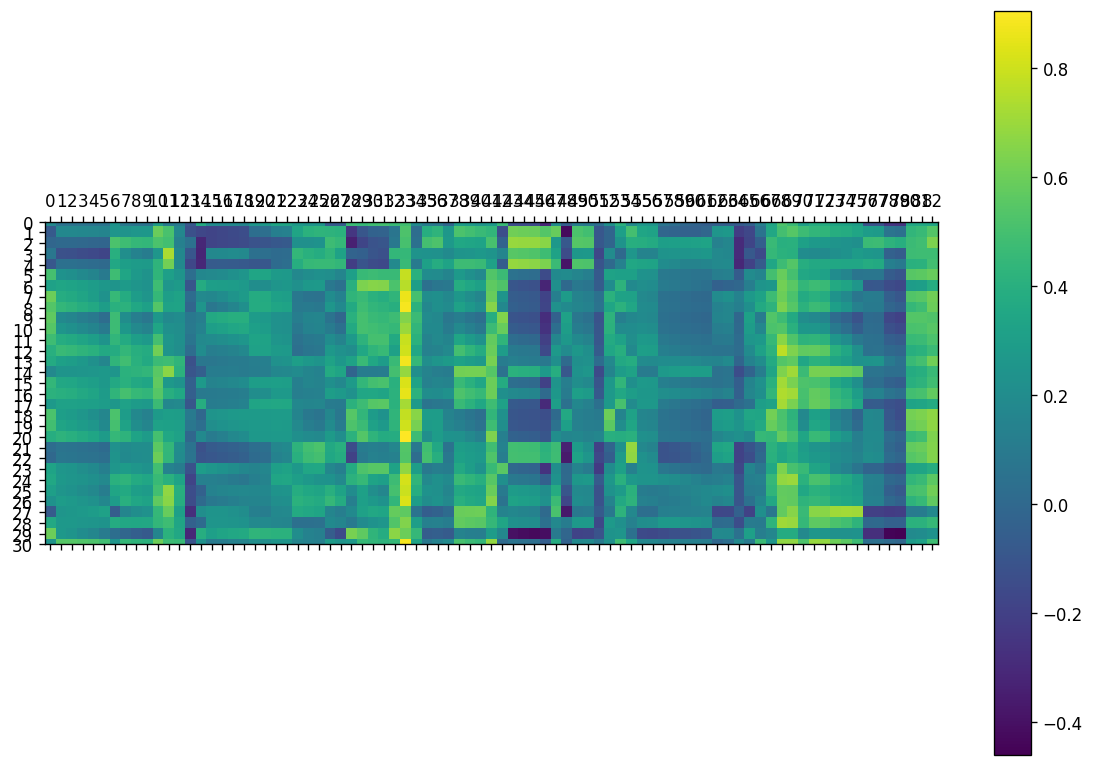

In [20]:
plt.figure(figsize=(12, 8), dpi= 120, facecolor='w')
plt.matshow(result,fignum=1)
plt.xticks(range(result.shape[1]),range(result.shape[1]))
plt.yticks(range(result.shape[0]),range(result.shape[0]))
plt.colorbar()
plt.show()

In [ ]:
#result.to_csv("result.tsv")

In [ ]:
#result['rna[432]'].idxmax()

In [ ]:
#st.pearsonr(len_saming(whole_qc_rna[432],whole_qc_atac[9])[0],len_saming(whole_qc_rna[432],whole_qc_atac[9])[1])

In [ ]:
#read_csv
#res = pd.read_csv("result.csv",index_col=0)
#res